In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv("C:\\Users\\AK\\Downloads\\polynomial_regression_train.csv")
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [31]:
split_length = int(0.8 * len(X))
X_train, y_train = X[:split_length], y[:split_length]
X_dev, y_dev = X[split_length:], y[split_length:]

In [32]:
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train_scaled = (X_train - X_train_mean) / X_train_std
X_dev_scaled = (X_dev - X_train_mean) / X_train_std

In [33]:
def polynomial_features_multi(x, degree):
    n_samples, n_features = x.shape
    x_poly = [np.ones(n_samples)]
    for d in range(1, degree + 1):
        for feature_indices in generate_combinations(n_features, d):
            feature = np.prod(x[:, feature_indices], axis=1)
            x_poly.append(feature)
    return np.column_stack(x_poly)

In [34]:
def generate_combinations(n_features, degree):
    if degree == 1:
        return [[i] for i in range(n_features)]
    combinations = []
    for i in range(n_features):
        for sub_combination in generate_combinations(n_features, degree - 1):
            if i <= sub_combination[0]:
                combinations.append([i] + sub_combination)
    return combinations

In [35]:
def gradient_descent(x, y, degree, regularization_strength, learning_rate=0.01, iterations=1000, gradient_clip_value=10):
    x_poly = polynomial_features_multi(x, degree)
    theta = np.zeros(x_poly.shape[1])
    m = len(y)
    for i in range(iterations):
        predictions = x_poly.dot(theta)
        errors = predictions - y
        gradient = (x_poly.T.dot(errors)) / m
        gradient[1:] += (regularization_strength / m) * theta[1:]
        gradient = np.clip(gradient, -gradient_clip_value, gradient_clip_value)
        theta -= learning_rate * gradient
        if np.any(np.isnan(theta)) or np.any(np.isinf(theta)):
            break
    return theta

In [36]:
def predict(x, theta, degree):
    x_poly = polynomial_features_multi(x, degree)
    return x_poly.dot(theta)

In [37]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

In [38]:
degree = 5
regularization_strength = 1.0

In [39]:
theta = gradient_descent(X_train_scaled, y_train, degree, regularization_strength)

In [40]:
y_train_pred = predict(X_train_scaled, theta, degree)
y_dev_pred = predict(X_dev_scaled, theta, degree)

In [41]:
r2_train = r2_score(y_train, y_train_pred)
r2_dev = r2_score(y_dev, y_dev_pred)

In [42]:
print(f"R2 Score on Train Data: {r2_train}")
print(f"R2 Score on Dev Data: {r2_dev}")

R2 Score on Train Data: 0.9457485892957942
R2 Score on Dev Data: 0.9434478220226037


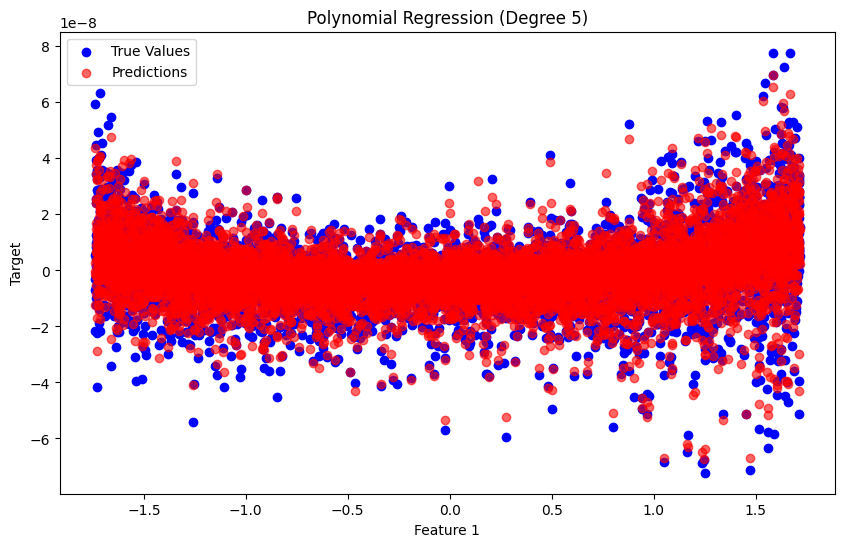

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(X_dev_scaled[:, 0], y_dev, color='blue', label='True Values')
plt.scatter(X_dev_scaled[:, 0], y_dev_pred, color='red', label='Predictions', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.show()

In [47]:
X_test_actual = pd.read_csv("C:\\Users\\AK\\Downloads\\polynomial_regression_test.csv")
X_test_actual.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,1,1.718004,-0.201814,0.791965,-0.410485,1.678171
1,2,0.782395,0.897345,-0.059263,-1.725306,-1.363520
2,3,0.619033,0.397670,-0.506356,-0.546682,-1.629186
3,4,1.950046,-1.874789,-0.144491,1.952435,1.908823
4,5,0.097417,0.960511,-1.031956,-1.585839,-1.297509


In [49]:
X_test = X_test_actual.iloc[:, 1:].values
X_test = (X_test - X_train_mean) / (X_train_std)

In [50]:
predictions = predict(X_test, theta, degree)

In [52]:
X_test_actual['PREDICTIONS'] = predictions

In [53]:
X_test_actual

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,PREDICTIONS
0,1,1.718004,-0.201814,0.791965,-0.410485,1.678171,1.174948e-08
1,2,0.782395,0.897345,-0.059263,-1.725306,-1.363520,-1.194726e-08
2,3,0.619033,0.397670,-0.506356,-0.546682,-1.629186,-9.483030e-10
3,4,1.950046,-1.874789,-0.144491,1.952435,1.908823,-2.317708e-09
4,5,0.097417,0.960511,-1.031956,-1.585839,-1.297509,-7.149440e-09
...,...,...,...,...,...,...,...
11995,11996,1.264677,-0.975995,-1.522923,-0.894496,1.166645,3.355607e-09
11996,11997,-1.134109,1.309373,1.057666,-1.103589,0.368445,5.946903e-11
11997,11998,-1.557074,-1.065746,1.440004,0.392618,-0.867881,-2.307355e-09
11998,11999,-0.750905,0.354496,-0.893223,0.960500,-1.309842,-2.793554e-09
